## Import necessary libraries

In [99]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Set Options

In [100]:
np.set_printoptions(suppress=True)

## Make Bandit Class

In [101]:
class Bandit:
    def __init__(self, p=None):
        self.p = p if p else random.random()
        self.times_succeeded = 0
        self.times_chosen = 1
        self.success_ratio = 0
    
    def choose(self):
        self.times_chosen += 1
        result = random.random() < self.p
        if result:
            self.times_succeeded += 1
        
        self.success_ratio = self.times_succeeded / self.times_chosen
        return result
    
    def reset(self):
        self.times_succeeded = 0
        self.times_chosen = 1
        self.success_ratio = 0

## Constant variables

In [102]:
BANDITS = 10
bandits = [Bandit() for _ in range(BANDITS)]

## Implementation of ucb

In [103]:
def ucb(bandits, n, plot=False):
    diff = [sum([bandit.times_succeeded / bandit.times_chosen for bandit in bandits])]
    total_times = sum([bandit.times_chosen for bandit in bandits])
    for t in range(n):
        values = [bandit.success_ratio + np.sqrt((2*np.log(total_times))/(bandit.times_chosen)) for bandit in bandits]
        chosen = values.index(max(values))
        bandits[chosen].choose()
        diff.append(sum([bandit.times_succeeded / bandit.times_chosen for bandit in bandits]))
    if plot:
        plt.xlabel("iterations")
        plt.ylabel("difference until perfection")
        diff = diff[1:]
        plt.plot(range(len(diff)), diff, label='ucb', color='red', linewidth=1)
    return diff

3.8291230428323013 3.754493519803683


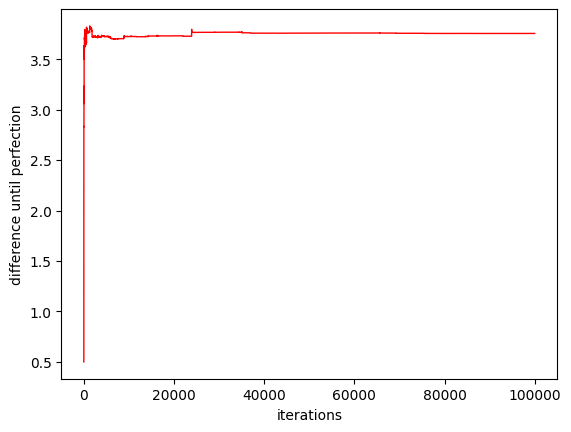

In [104]:
rewards = ucb(bandits, 100000, True)
print(max(rewards), rewards[-1])

In [105]:
for bandit in bandits:
    print(f"Chosen: {str(bandit.times_chosen).ljust(10)}, Succeeded: {str(bandit.times_succeeded).ljust(10)}, Expected: {str(bandit.p).ljust(20)}, Experimented: {str(bandit.success_ratio).ljust(20)}, Difference: {str(abs(bandit.p - bandit.success_ratio)).ljust(20)}")
    
print(f"\nWins: {str(sum([bandit.times_succeeded for bandit in bandits])).ljust(10)} / {str(sum([bandit.times_chosen for bandit in bandits])).ljust(20)}")
print(f"Wins: {str(int(sorted(bandits, key=lambda x: x.success_ratio, reverse=True)[0].p * sum([bandit.times_chosen for bandit in bandits]))).ljust(10)} / {str(sum([bandit.times_chosen for bandit in bandits])).ljust(10)}")
print(f"How close you got to the best result: %{((sum([bandit.times_succeeded for bandit in bandits]) / (sorted(bandits, key=lambda x: x.success_ratio, reverse=True)[0].p * sum([bandit.times_chosen for bandit in bandits]))) * 100):.2f}")

Chosen: 621       , Succeeded: 521       , Expected: 0.8612603232147479  , Experimented: 0.8389694041867954  , Difference: 0.02229091902795244 
Chosen: 6         , Succeeded: 0         , Expected: 0.005618822256981737, Experimented: 0.0                 , Difference: 0.005618822256981737
Chosen: 98909     , Succeeded: 90829     , Expected: 0.9183493457378175  , Experimented: 0.9183087484455409  , Difference: 4.059729227656739e-05
Chosen: 6         , Succeeded: 0         , Expected: 0.021822341049455574, Experimented: 0.0                 , Difference: 0.021822341049455574
Chosen: 6         , Succeeded: 0         , Expected: 0.30202183548126127 , Experimented: 0.0                 , Difference: 0.30202183548126127 
Chosen: 58        , Succeeded: 37        , Expected: 0.6556968721539844  , Experimented: 0.6379310344827587  , Difference: 0.017765837671225748
Chosen: 6         , Succeeded: 0         , Expected: 0.04666725075915634 , Experimented: 0.0                 , Difference: 0.0466672507

## Results
- As we can see the results are so perfect